<a href="https://colab.research.google.com/github/HarmonyKM/sales-predictions/blob/main/Sales_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis**

**PROJECT 1**
- **Harmony Gasologa**

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
filename = '/content/drive/MyDrive/sales_predictions.csv'

In [157]:
df =pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### **1. How many rows and columns?**

In [158]:
#1. To find how many rows and columns, & 2.What are the datatypes 
df.info()

#Output tells us we have 8523 rows and 12 columns

#The output also tells us that there are 4 columns with the dtype float64, 1 column with the dtype int64 and 7 columns with the dtype object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### **2. What are the datatypes of each Variable**

*from the output above we have:*

- 4 columns with the datatype float64
- 1 column with the datatype int64
- 7 columns with the datatype object

### **3. Are there duplicates? if so, drop any duplicates**

In [159]:
#Check for duplicates
df.duplicated().sum()

0

### **4. Identify missing values**

In [160]:
#Check for missing values
df.isna().sum()

#Output revealed Item Weight & Outlet Size have missing Values

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

###**5. Decide on how to address the missing values, and do it &** 
*6. Confirm that there are no missing values after addressing them*

In [161]:
#I will replace the the missing values with the average of the Item_Weights column
weight_mean = df['Item_Weight'].mean()
df['Item_Weight'].fillna('weight_mean', inplace=True)

#Verify change for Item_Weight column was succesful and there are no missing values
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [162]:
#These missing values may be material and since I am not an expert I will use my judgment to replace missing values with the word 'Missing' in the Outlet_Size column.

#To replace missing values with the word 'Missing'
df['Outlet_Size'].fillna('Missing', inplace=True)

#Verifying change for Outlet_Size column was successful and there are no missing values
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [163]:
df['Item_Weight'].describe()
#We have an error in the column

count            8523
unique            416
top       weight_mean
freq             1463
Name: Item_Weight, dtype: object

### **6. Confirm that there are no missing values after addressing them**

In [164]:
# Replace the incorrect value in Item Weight and try again to change the type
df['Item_Weight'] = df['Item_Weight'].replace('weight_mean', 12.857645184135976)
df['Item_Weight'] = df['Item_Weight'].astype(float)
df.info()

#Error has been fixed, with the Item Weight now returnins as a float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [165]:
#The Outlet_Size measures the size of the store in terms of area covered and this is vital data should they expand. I will not drop but i will fill with "Missing"
df['Outlet_Size'].fillna('Missing', inplace=True)

#Verify change for Outlet_Size column was succesful and there are no missing values
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### **7. Find and fix any inconsistencies**

In [166]:
df.head(40)

#Output reveals the data in the Item_Fat_Content is inconsistent

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Missing,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Missing,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Missing,Tier 2,Supermarket Type1,4710.5350


In [167]:
#Check the unique values and counts of the 'Item_Fat_Content' column
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [168]:
#Fixing inconsistent categories of data LF to Low Fat
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')
df['Item_Fat_Content'].value_counts()

Low Fat    5405
Regular    2889
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [169]:
#Fixing inconsistent categories of data low fat to Low Fat
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    2889
reg         117
Name: Item_Fat_Content, dtype: int64

In [170]:
#Fixing inconsistent categories of data reg to Regular
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

### **8. For any numerical columns, obtain the summary statistics of each**

In [171]:
#To show summary statistics for each column, limiting to 2 decimal places
df.describe().round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00,8523.00,8523.00,8523.00,8523.00
mean,12.86,0.07,140.99,1997.83,2181.29
std,4.23,0.05,62.28,8.37,1706.50
min,4.56,0.00,31.29,1985.00,33.29
25%,9.31,0.03,93.83,1987.00,834.25
50%,12.86,0.05,143.01,1999.00,1794.33
75%,16.00,0.09,185.64,2004.00,3101.30
max,21.35,0.33,266.89,2009.00,13086.96


# **Part 3**

- **Histogram, Boxplot & Heatmap**

## **Histograms**

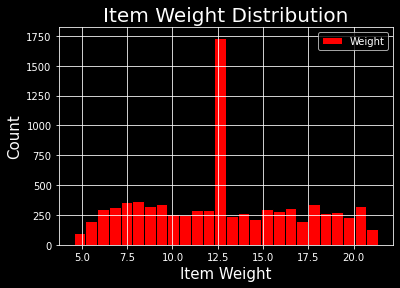

In [172]:
#To plot a Histogram of the Item Weight

df['Item_Weight'].hist(bins = 'auto', color = 'red', edgecolor = 'black', label = 'Weight');
plt.title('Item Weight Distribution', fontsize = 20)
plt.xlabel('Item Weight', fontsize = 15);
plt.ylabel('Count', fontsize = 15);
plt.legend();

**The histogram tells us that the Items that have a weight of 12.5 are the highest percentage of the total count**

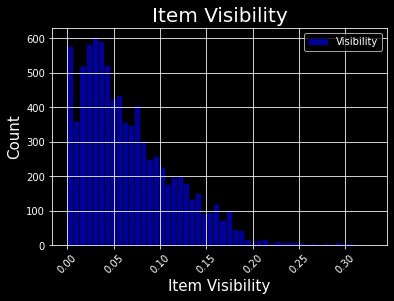

In [173]:
plt.style.use('dark_background')
df['Item_Visibility'].hist(color = 'blue',
                     bins = 'auto',
                     edgecolor = 'black',
                     label = 'Visibility',
                     alpha = 0.6);                           
plt.title('Item Visibility', fontsize = 20);
plt.xlabel('Item Visibility', fontsize = 15);
plt.ylabel('Count', fontsize = 15);
plt.xticks(rotation = 45);
plt.legend();

## **Boxplot**

**To plot 2 different multivariate graphs showing the relationship between some of the columns(Outlet Type, Outlet Sales & MRP)**

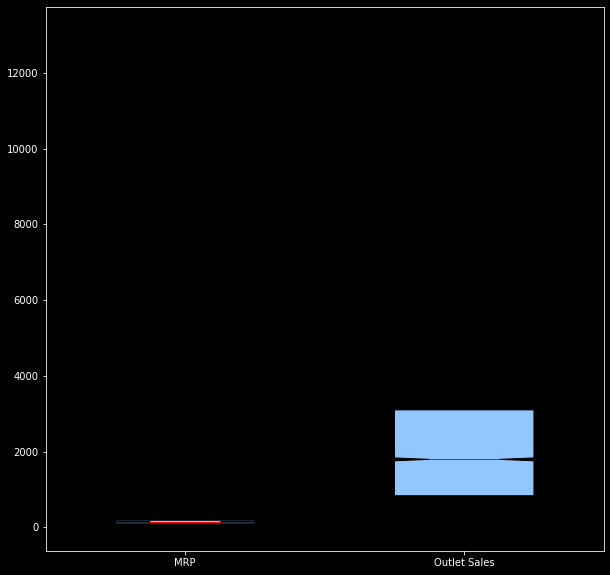

In [174]:
from IPython.core.pylabtools import figsize
mrp= df['Item_MRP']
sales = df['Item_Outlet_Sales']
fig,axes = plt.subplots(nrows=1,ncols=1, figsize=(10,10) )
boxplots = axes.boxplot([mrp, sales], notch= True,labels = ['MRP','Outlet Sales'],
             widths = .5,
             patch_artist = True,
             medianprops = dict(linestyle = '-',linewidth = 1, color = 'red'),
             boxprops = dict(linestyle = '--', linewidth = 1, color = 'black'));

**This boxplot shows that the different outlet types buy products at a very low cost and sell for High margins**

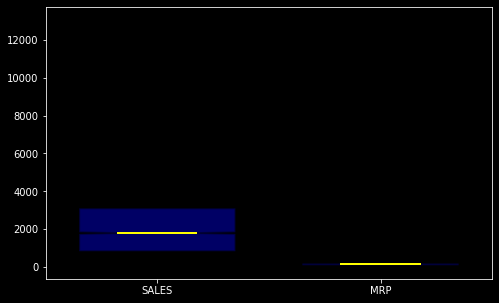

In [175]:
# To plot a boxplot graph of Item MRP and Item Outlet Sales
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8,5))
MRP = df['Item_MRP']
SALES = df['Item_Outlet_Sales']
boxplots = axes.boxplot([SALES, MRP],
                        notch = True,
                        labels = ['SALES', 'MRP'],
                        widths = .7,
                        patch_artist = True,
                        medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
                        boxprops = dict(linestyle= '--', linewidth=2, color='black', facecolor = 'blue', alpha = .4));

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

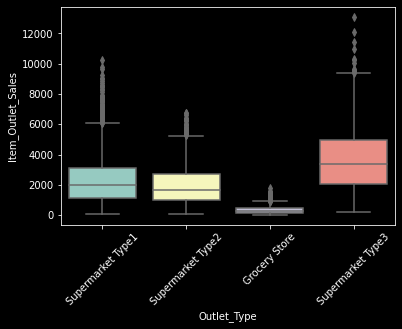

In [176]:
#To plot a boxplot graph of Outlet Type and Item Outlet Sales
import seaborn as sns
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=df)
plt.xticks(rotation = 45)

**The boxplot graph of Outlet Type and Item Outlet Sales shows that each of the Supermarket Outlet Types have greater sales than the Grocery Store.**

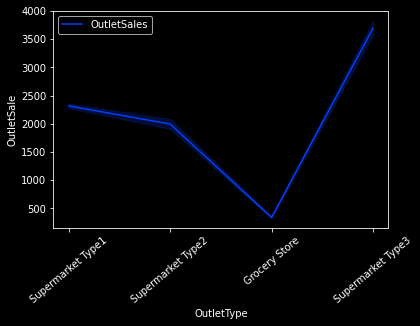

In [177]:
from traitlets.traitlets import Type
plt.style.use('seaborn-bright')
sns.lineplot(x='Outlet_Type',y='Item_Outlet_Sales',data=df,label=f'OutletSales');
plt.xlabel('OutletType');
plt.ylabel('OutletSale');
plt.xticks(rotation=40);
plt.legend();

## **Heatmaps**

- *Correaltion between features*

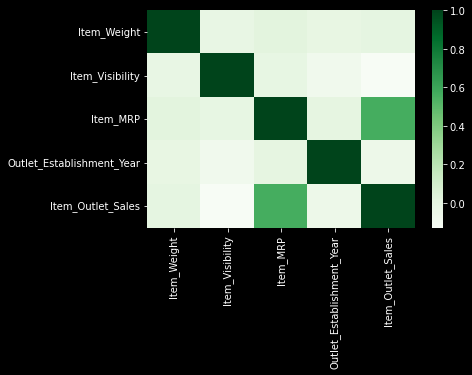

In [178]:
import seaborn as sns
corr=df.corr()
sns.heatmap(corr, cmap = 'Greens');

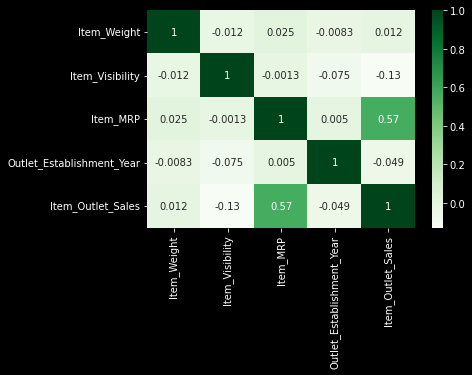

In [179]:
sns.heatmap(corr, cmap = 'Greens', annot = True);

### **This heat map tells us that there is a moderate correlation between Item Outlet Sales and Item MRP**

# **Part 4**

### **To create two more visualizations to show the distribution of Outlet Sales per Outlet Type**

In [180]:
# Creating a variable to summarize the visualization I am creating
Sales_per_outlet_type = df.groupby(['Outlet_Type'])['Item_Outlet_Sales']

In [181]:
Sales_per_outlet_type.describe()

,count,mean,std,min,25%,50%,75%,max
Outlet_Type,,,,,,,,
Grocery Store,1083.0,339.828500,260.851582,33.2900,153.79980,256.9988,458.73620,1775.6886
Supermarket Type1,5577.0,2316.181148,1515.965558,73.2380,1151.16820,1990.7420,3135.91800,10256.6490
Supermarket Type2,928.0,1995.498739,1375.932889,69.2432,981.55565,1655.1788,2702.64865,6768.5228
Supermarket Type3,935.0,3694.038558,2127.760054,241.6854,2044.33890,3364.9532,4975.52340,13086.9648


In [182]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

### **The First visualization will be a line plot using Matplotlib**

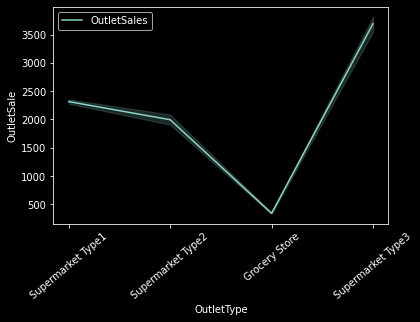

In [183]:
from traitlets.traitlets import Type
plt.style.use('dark_background')
sns.lineplot(x='Outlet_Type',y='Item_Outlet_Sales',data=df,label=f'OutletSales')
plt.xlabel('OutletType')
plt.ylabel('OutletSale')
plt.xticks(rotation=40)
plt.legend()

The visualization above shows that the Grocery Store has the least amount of sales and the Supermarket type 3 has the most Sales.

### **The second visualization will be a bar graph using Matplotlib**

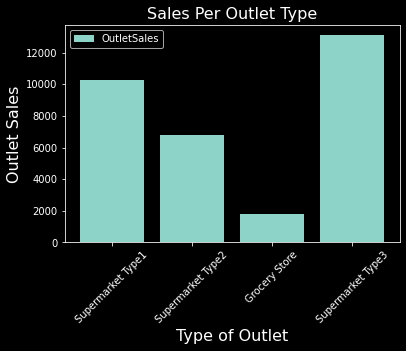

In [184]:
plt.bar('Outlet_Type', 'Item_Outlet_Sales',data=df, label='OutletSales')
plt.style.use('seaborn-pastel')
plt.xlabel('Type of Outlet', fontsize = 16)
plt.ylabel('Outlet Sales', fontsize = 16)
plt.title('Sales Per Outlet Type', fontsize = 16)
plt.xticks(rotation=45)
plt.legend()

This visualization above also shows that the Grocery Store has the least amount of sales and the Supermarket type 3 has the most Sales. In my opinion, this graph is easier to read and understand. Tried out the pastel chart style to see how it is.

# **Part 5** Machine Learning

## **Load Libraries and inpsect data**

### **Import Libraries**

In [185]:
## Preprocessing

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

## Set global scikit-learn configuration 
from sklearn import set_config
## Display estimators as a diagram
set_config(display='diagram') # 'text' or 'diagram'}




### **2. Load the Data**

In [186]:
path = '/content/drive/MyDrive/sales_predictions.csv'
df = pd.read_csv(path)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [187]:
# Make a copy of the original df to avoid any manipulations
df_pp = df.copy()

### **3. Explore the Data**

In [188]:
# Look at the info from the data
print(df_pp.info(), '\n')
print(df_pp.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None 

Item_Identifier                 0
Item

### **4. Fix Inconsistencies in Categorical data**

In [189]:
df_pp['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [190]:
df_pp['Item_Fat_Content'].replace(['LF'], ['Low Fat'], inplace=True)
df_pp['Item_Fat_Content'].replace(['low fat'], ['Low Fat'], inplace=True)
df_pp['Item_Fat_Content'].replace(['reg'], ['Regular'], inplace=True)
df_pp['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

## **Check for Duplicated, Missing, or Erroneous Data**

In [191]:
# Display the sum of missing values
df_pp.isna().sum().sum()

3873

In [192]:
# Display the sum of missing values
df_pp.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

## **5. Drop Duplicates**

In [193]:
# Check to see if there are any duplicated rows
df_pp.duplicated().sum()

0

In [194]:
# Display descriptive statistics for all columns
df_pp.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## **6. Split the Data (Validation Split)**

- Identify features (X) and target (y)

In [195]:
# split X and y, you are Item Outlet Sales
X = df.drop('Item_Outlet_Sales', axis=1)
y = df['Item_Outlet_Sales']

## **Perform a train test split**

In [196]:
# split training and test
# set random_state to 42 for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25 , random_state=42)

## **Pre-processing**

 - Impute missing values 
 - Use the 'mean' strategy for numeric columns 
 - Use the 'most_frequent' strategy for categorical columns

## **Instantiate Column Selectors**

In [197]:
#Instantiate columns selectors
num_selector = make_column_selector(dtype_include= 'number')
cat_selector = make_column_selector(dtype_include='object')

## **Instantiate Transformers**

In [198]:
#Instatiate Transformers
mean_imputer = SimpleImputer(strategy='mean')
freq_imputer = SimpleImputer(strategy='most_frequent')

#Scaler
scaler = StandardScaler()

#OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

- One-hot encode nominal features
- Scale the numeric columns

## **Instantiate Pipelines**

In [199]:
#Instatiate Pipelines

#Numeric Pipeline
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [200]:
#Categorical Pipeline
categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

## **Instantiate ColumnTransformer**

In [201]:
# Tuples for Column Transformer
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)

# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple, remainder='passthrough')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ff374574a30>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ff374574cd0>)])

## **Fit Preprocessor**

- All preprocessing steps should be contained within a single preprocessing object
- We fit the ColumnTransformer, which we called 'preprocessor' on the training data. **(Never on testing data!)**

In [202]:
# fit on train
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ff374574a30>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ff374574cd0>)])

## **Transform Data**

In [203]:
# transform train and test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

## **Final**

### **Import Libraries**

In [273]:
## Models
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
     
import sklearn.metrics as metrics

## Regression Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

### **Function**

In [249]:
## Create a function to take the true and predicted values
## and print MAE, MSE, RMSE, and R2 metrics
def model_metrics(pipe, x_train, y_train, x_test, y_test, 
                       model_name='Regression Model', ):
  ## Train
  mae = round(mean_absolute_error(y_train, pipe.predict(x_train)),4)
  mse = round(mean_squared_error(y_train, pipe.predict(x_train)),4)
  rmse = round(np.sqrt(mean_squared_error(y_train, pipe.predict(x_train))),4)
  r2 = round(r2_score(y_train, pipe.predict(x_train)),7)
  print(f'{model_name} Train Scores')
  print(f'MAE: {mae:,.4f} \nMSE: {mse:,.4f} \nRMSE: {rmse:,.4f} \nR2: {r2:,.4f}\n')

  ## Test
  mae = round(mean_absolute_error(y_test, pipe.predict(x_test)),4)
  mse = round(mean_squared_error(y_test, pipe.predict(x_test)),4)
  rmse = round(np.sqrt(mean_squared_error(y_test, pipe.predict(x_test))),4)
  r2 = round(r2_score(y_test, pipe.predict(x_test)),7)

  ## Display the metrics for the model
  print(f'{model_name} Test Scores')
  print(f'MAE: {mae:,.4f} \nMSE: {mse:,.4f} \nRMSE: {rmse:,.4f} \nR2: {r2:,.4f}\n')

### **Load Data**

In [250]:
path = '/content/drive/MyDrive/sales_predictions.csv'
df = pd.read_csv(path)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [251]:
#Copy of my Data
eda_ml = df.copy()

### **Duplicates**

In [252]:
#Duplicated Rows
print(f'There are {eda_ml.duplicated().sum()} duplicate rows.')

There are 0 duplicate rows.


In [253]:
## Display the column names, count of non-null values, and their datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [254]:
eda_ml.replace(["LF"], ["Low Fat"], inplace=True)
eda_ml.replace(["low fat"], ["Low Fat"], inplace=True)
eda_ml.replace(["reg"], ["Regular"], inplace=True)
eda_ml["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [255]:
## Display the descriptive statistics for the numeric columns
df.describe(include='all') ## or 'object'## or 'number'

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


### **Split the Data**

In [256]:
#Define X and y
target ='Item_Outlet_Sales' 
X = eda_ml.drop(columns= [target]).copy()
y = eda_ml[target].copy()



In [257]:
# Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

**The target is Item_Outlet_Sales, which we are trying to Predict**

### **Preprocessing**

### **Column Selector**

In [258]:
## Instantiate the column selectors
num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include='object')

### **Transformers**

In [259]:
## Instantiate the transformers
freq_imputer = SimpleImputer(strategy = 'most_frequent')
mean_imputer = SimpleImputer(strategy = 'mean')

#Scaler
scaler = StandardScaler()

# OneHotEncoder 
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

- Nominal is one hot-encode
- Numeric is scaler

### **Numeric Pipeline**

In [260]:
#Instantiate Pipeline

#Numerical Pipeline
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [261]:
#Categorical Pipeline
categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe
     

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

### **Instantiate ColumnTransformer**

In [262]:
# Tuples for Column Transformer
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)


In [263]:
# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple, remainder='passthrough')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ff37a0a4850>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ff37a963850>)])

## **Fit and Transform Data**

- All preprocessing steps should be contained within a single preprocessing object
- We fit the ColumnTransformer, which we called 'preprocessor' on the training data. **(Never on testing data!)**

In [264]:
# fit on train
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ff37a0a4850>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ff37a963850>)])

The fit method worked to fit all 4 transformers inside the ColumnTransformer. We will use that fitted ColumnTransformer to transform both our training and testing datasets.

In [265]:
# transform train and test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

### **Model the Data**

- **Baseline Model**

In [266]:
## Create an instance of the model
dummy = DummyRegressor(strategy='mean')
## Create a model pipeline
dummy_pipe = make_pipeline(preprocessor, dummy)
## Fit the model
dummy_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff37a0a4850>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff37a963850>)])),
                ('dummyregressor', DummyRegressor())])

### **Metrics**

In [267]:
## Display the Model's metrics
model_metrics(dummy_pipe, x_train=X_train, y_train=y_train, 
                          x_test=X_test, y_test=y_test, 
                           model_name='Dummy Model')

Dummy Model Train Scores
MAE: 1,360.2184 
MSE: 2,959,455.7045 
RMSE: 1,720.3069 
R2: 0.0000

Dummy Model Test Scores
MAE: 1,326.1210 
MSE: 2,772,144.4627 
RMSE: 1,664.9758 
R2: -0.0048



**R^2 shows the model is undefined**
**though RSME shows a good fit model**

### **1. Linear Regression Model to Predict Sales**

In [268]:
# Create an instance of model 
lin_reg = LinearRegression()

# create a pipeline for regression model
lin_reg_pipe = make_pipeline(preprocessor, lin_reg)

# fit on model
lin_reg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff37a0a4850>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff37a963850>)])),
                ('linearregression', LinearRegression())])

### **Metrics**

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

**To measure performance based on R^2**

In [279]:
## Measuring model performance - using builtin .score()
print(f"Train R-Squared: { round( lin_reg_pipe.score(X_train, y_train),3) }")
print(f"Test R-Squared: { round( lin_reg_pipe.score(X_test, y_test),3) }")

Train R-Squared: 0.671
Test R-Squared: -1.6575880497968222e+19


**To measure performance based on RMSE**

In [280]:
# get predictions for train and test data
y_hat_train = lin_reg_pipe.predict(X_train)
y_hat_test = lin_reg_pipe.predict(X_test)

In [281]:
# Get RMSE for train vs test
rmse_train =  mean_squared_error(y_train, y_hat_train, squared=False)
rmse_test = mean_squared_error(y_test, y_hat_test, squared=False)
print(f"Train RMSE: { round(rmse_train, 2)}")
print(f"Test RMSE: { round( rmse_test, 2)}")

Train RMSE: 986.09
Test RMSE: 6762579228319.0


In [269]:
# Metrics for linear regression 
model_metrics(lin_reg_pipe, x_train=X_train, y_train=y_train,
                          x_test=X_test, y_test=y_test,
                            model_name='Linear Regrssion')

Linear Regrssion Train Scores
MAE: 736.1576 
MSE: 972,365.2275 
RMSE: 986.0858 
R2: 0.6714

Linear Regrssion Test Scores
MAE: 558,742,259,972.5935 
MSE: 45,732,477,819,291,585,684,176,896.0000 
RMSE: 6,762,579,228,318.9990 
R2: -16,575,880,497,968,222,208.0000



## Linear Regression Model Observations

- This model performs fairly well on the training set. But performs very poorly on the testing set. 
- Most likely, this data is not well suited for a Linear Model. 
- Therefore, we will explore using other models to see how they perform.
- The R^2 for train score is acceptable, R^2 for test score reveal a negative result, Moreover, it could be underfited by due to the lack of data in our dataset
- The RMSE in the test and train scores significantly far apart from each other, though both keep the same units

### **2. Regression Tree Model to Predict Sales**

In [282]:
## Create a decsing tree
dec_tree = DecisionTreeRegressor(random_state = 42)

## Pipeline

dec_tree_pipe = make_pipeline(preprocessor, dec_tree)

# Fit the model
dec_tree_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff37a0a4850>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff37a963850>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

**To predict the target values for Outlet Sales**

In [283]:
train_preds = dec_tree.predict(X_train_processed)
test_preds = dec_tree.predict(X_test_processed)

### **Metrics**

In [284]:
# evaluate the model
train_score = dec_tree.score(X_train_processed, y_train)
test_score = dec_tree.score(X_test_processed, y_test)
print(train_score)
print(test_score)

1.0
0.23769742878875222


In [271]:
# Metrics for Decision tree regressor
model_metrics(dec_tree_pipe, x_train=X_train, y_train=y_train,
                            x_test=X_test, y_test=y_test,
                              model_name='Decision Tree model')

Decision Tree model Train Scores
MAE: 0.0000 
MSE: 0.0000 
RMSE: 0.0000 
R2: 1.0000

Decision Tree model Test Scores
MAE: 984.1583 
MSE: 2,099,666.1777 
RMSE: 1,449.0225 
R2: 0.2390



**To Tune the model for optimized results**

In [285]:
# Looking at options for tuning this model
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [286]:
# To find the depth of the model
dec_tree.get_depth()

60

In [287]:
#To find how many leaf nodes exist in the model
dec_tree.get_n_leaves()

6255

**To use the for Loop to get a list of values for max_depth**

In [288]:
# List of values to try for max_depth:
depths = list(range(2, 42)) # will try every value between 2 and 36
# Data frame to store the score for each value of max_depth:
scores = pd.DataFrame(index=depths, columns=['Test Score','Train Score'])
for depth in depths:
    dec_tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
    dec_tree.fit(X_train_processed, y_train)
    train_score = dec_tree.score(X_train_processed, y_train)
    test_score = dec_tree.score(X_test_processed, y_test)
    scores.loc[depth, 'Train Score'] = train_score
    scores.loc[depth, 'Test Score'] = test_score

**To visualize max_depth values**

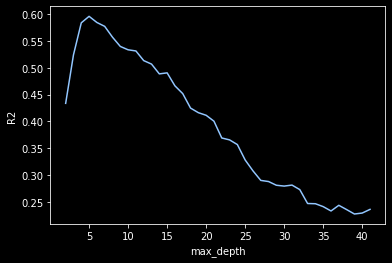

In [289]:
# Visualize which max_depth leads to the highest r2 score
import matplotlib.pyplot as plt
plt.plot(depths, scores['Test Score'])
plt.xlabel('max_depth')
plt.ylabel('R2');

**The graph tells us that the max depth for optimum results for this model is 5**

In [290]:
#To verify that Depth of 5 has the highest scores.
sorted_scores = scores.sort_values(by='Test Score', ascending=False)
sorted_scores.head()

,Test Score,Train Score
5,0.596056,0.604207
6,0.584616,0.615702
4,0.583937,0.582705
7,0.577384,0.629269
8,0.55714,0.641334


**To Run model with the optimized depth of 5**

In [291]:
# To run the model with the optimized value for max_depth
dec_tree_6 = DecisionTreeRegressor(max_depth = 6, random_state = 42)
dec_tree_6.fit(X_train_processed, y_train)
train_6_preds = dec_tree_6.predict(X_train_processed)
test_6_preds = dec_tree_6.predict(X_test_processed)
train_6_score = dec_tree_6.score(X_train_processed, y_train)
test_6_score = dec_tree_6.score(X_test_processed, y_test)
print(train_6_score)
print(test_6_score)

0.6157022844525739
0.5846155162322847


**Test output is not far from the training output**

### ** To compare the performance model based on R^2 and RMSE**

In [292]:
#Using eval regression function to calculate R^2 and RMSE
def eval_regression(true, pred):
  mse = mean_squared_error(true, pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(true, pred)

  print(f'RMSE: {rmse},\n R^2: {r2} ')

In [293]:
eval_regression(y_train,dec_tree_6.predict(X_train_processed))
eval_regression(y_test,dec_tree_6.predict(X_test_processed))

RMSE: 1066.4483421682248,
 R^2: 0.6157022844525739 
RMSE: 1070.5308759780908,
 R^2: 0.5846155162322847 


### **Summary**

With the evaluation of both the Decision Trees model and the linear regression model, the Decision tree is my recommended model. The justification is that the output for the R^2 training has higher values than the Linear regression model. The RMSE for the Decision Tree model is less than the Linear regression meaning there are going to me lower erroneous predictions than the Linear regression model.